$$\newcommand{\bra}[1]{\left\langle{#1}\right\rangle} \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$ 
# Qubits - Vector Notation #

We want a neat way to denote the classical bits 0, 1. Using the dirac (braket) notation: $$ \bra{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} ,  \bra{1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

Can we define other states?

## Tensor Product ##

We won't go into technical details, look through it with examples:

$\bra{00} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}, \bra{01} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}, \bra{10} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}, \bra{11} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}$

As a general idea the tensor product specifies how a quantum (or classical state) can be formed as a product of previous states

In [95]:
def tensor_dot( state1, state2 ):
    product = []
    for x in state1:
        for y in state2:
            product.append( x * y )
    return product

state_0 = [ 1, 0 ]
state_1 = [ 0, 1 ]
product = tensor_dot( state_0, state_1)
#print( product )
#print( tensor_dot( state_1, product ) )

# Quantum Operators #

Simply take bits (vectors) and transform them somehow.

Example on 1 bit state: NOT.

$$NOT(\bra{0}) = NOT \begin{pmatrix} 1 \\ 0 \end{pmatrix}  = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \bra{1}$$

NOT is a matrix.

$$ NOT = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$ 

In general, matrix operators are matrices with one condition. They must be invertible (invertible computation). Additionally, they are their own inverses.

In [96]:
def transform( operator, state ):
    return np.array( operator ).dot( state )

NOT = [ [ 0, 1 ], [ 1, 0 ] ] 
inverted = transform( NOT, state_0 )
print( inverted )
print( transform( NOT, inverted ) )

[0 1]
[1 0]


# The CNOT Operator #

The CNOT operator is applied to a 2-bit state. Simply if the first bit is zero leave the second as is, otherwise invert second bit.

$$ CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$

In [97]:
def cnot( state ):
    operator = [ [ 1, 0, 0, 0 ],
                 [ 0, 1, 0, 0 ],
                 [ 0, 0, 0, 1 ],
                 [ 0, 0, 1, 0 ] ]
    return transform( operator, state )

def make_state( input ):
    if input == 0:
        return [ 1, 0 ]
    elif input == 1:
        return [ 0, 1 ]
    else:
        return -1

for bit1 in range( 2 ):
    for bit2 in range( 2 ):
        v1 = make_state( bit1 )
        v2 = make_state( bit2 )
        vector_state = tensor_dot( v1, v2 )
        print( "state: ", vector_state, ", cnot: ", cnot( vector_state ) )

state:  [1, 0, 0, 0] , cnot:  [1 0 0 0]
state:  [0, 1, 0, 0] , cnot:  [0 1 0 0]
state:  [0, 0, 1, 0] , cnot:  [0 0 0 1]
state:  [0, 0, 0, 1] , cnot:  [0 0 1 0]


# What about some weirdness? #

Quantum Operators are matrices being their own inverse.

$$ H = \begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} \end{pmatrix} $$

This is a valid operator, but what does it do? Let's experiment.

In [98]:
from math import sqrt

def hadamard( state ):
    operator = [ [ 1/sqrt(2), 1/sqrt(2) ], [ 1/sqrt(2), -1/sqrt(2) ] ]
    return transform( operator, state )
    
for bit1 in range( 2 ):
    vector_state = make_state( bit1 )
    print( "state: ", vector_state, ", hadamard: ", hadamard( vector_state ) )

state:  [1, 0] , hadamard:  [0.70710678 0.70710678]
state:  [0, 1] , hadamard:  [ 0.70710678 -0.70710678]


# Superposition #

We avoided talking about how a state is really defined. From some experience with quantum computing we want to somehow capture the idea of a qubit being at 2 states 'at once'.

Formally, we define a qubit as a vector: $\bra{\Psi} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$ where $\alpha, \beta \in \mathbb{C}$ and furthermore $||\alpha||^2 + ||\beta||^2 = 1$

That is, the amplitudes ($||\alpha||, ||\beta||$) represent the 'probability' the qubit ends up in either state when measured.

Hadamard gates basically implement a 'balanced' superposition. That is, a superposition that sends the qubit to each state uniformly at random.

# The Bloch Circle #

If $\alpha, \beta$ where real numbers a qubit is basically a point in the unitary circle. Every quantum operator basically spins the qubit around.

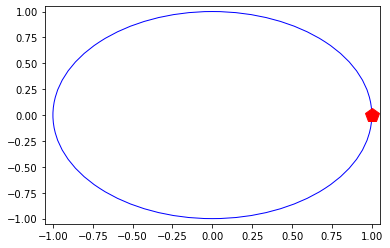

In [99]:
import matplotlib.pyplot as plt

def render_circle():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    circ = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
    ax.add_patch(circ)

state = [ 1, 0 ]
render_circle()
plt.plot( state[ 0 ], state[ 1 ],'rp', markersize=14 )
plt.xlim( -1.05, 1.05 )
plt.ylim( -1.05, 1.05 )
plt.show()

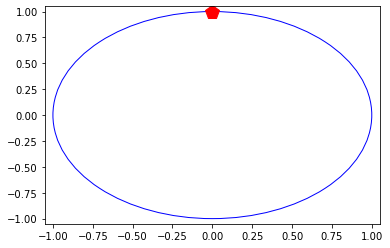

In [100]:
state2 = [ 0, 1 ]
render_circle()
plt.plot( state2[ 0 ], state2[ 1 ],'rp', markersize=14 )
plt.xlim( -1.05, 1.05 )
plt.ylim( -1.05, 1.05 )
plt.show()

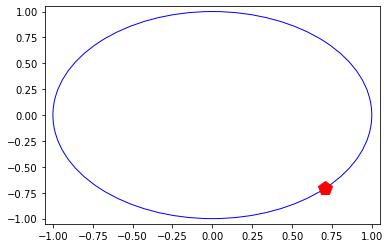

In [101]:
state_h = hadamard( state2 )
render_circle()
plt.plot( state_h[ 0 ], state_h[ 1 ],'rp', markersize=14 )
plt.xlim( -1.05, 1.05 )
plt.ylim( -1.05, 1.05 )
plt.show()

# The Bloch Sphere #

If $\alpha, \beta$ are general complex numbers we can show that they move on a sphere of radius 1. This is called the Bloch Sphere and is used to capture how a quantum operator affects qubits.

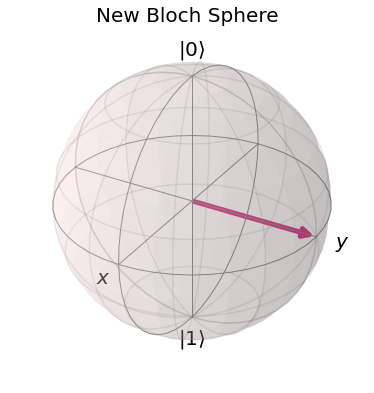

In [102]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([0,1,0], title="New Bloch Sphere")

# Additional Material #

The next notebook is about qiskit. Qiskit is an open source library for implementing and running quantum circuits. You can learn more about qiskit on the following links:

- Qiskit Official Website: https://qiskit.org/
- Qiskit example notebooks: https://qiskit.org/documentation/tutorials
- Qiskit Playlist(Introduction): https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY
- Qiskit Textbook: https://qiskit.org/textbook

Additionally:

- Quantum Computing for Computer Scientists: https://www.youtube.com/watch?v=F_Riqjdh2oM&t=3391s